## Ideal linear regression
![linear_function](https://phyblas.hinaboshi.com/rup/nayuki/2018/i01.png)

### $$z = wx + b$$

## Mostly found regression
![reg](https://phyblas.hinaboshi.com/rup/nayuki/2018/i03.png)

# Basis Function 
# $$ \mathbf{\begin{align}z = \sum_{i=1}^{n} \, w_i\phi_i(x)
\end{align}
}$$

$ \text{  z = Sum of some fucntions, i.e. $z = sin(x) + e^{-x} $}$ 

## $ \phi_i(x) $ is basis func, $ w_i $ is weight ( signification ) of each functions

### Popular basic function is **Polynomial funcion**
$ \phi_i(x) \, = \, x^{i-1}$
<br />
$ \begin{align}z \, = \, \sum_{i=1}^n w_i x^{i-1}\, = \, w_1 + w_2x + w_3x^2 + \dots + 
w_n x^{n-1}
\end{align}
$

### or write in matrix format
### $$ 
\begin{align}
z &= 
\begin{bmatrix}
    \phi_1(x) & \phi_2{x} & \cdots & \phi_n(x)
\end{bmatrix}
\begin{bmatrix}
    w_1 \\ w_2 \\ \vdots \\ w_n
\end{bmatrix} \\
&= \color{red}{\vec{\phi}^T \vec{w} }
\end{align}
$$

### Z for polynomial : $\phi_i(x) = x^{i-1}$
#### $$ \begin{align}
\vec{\phi}(x) =
\begin{bmatrix}
 1 \\ x \\ x^2 \\ \vdots \\ x^{m-1}
\end{bmatrix}
\end{align}$$

## Then Solve $\vec{w} = ?$


## $$ 
\begin{align} 
sse = J(w) = \sum_{i=1}^n (z_{i,predict} - z_{i,true})^2
\end{align} 
$$
### $ 
\vec{z} = \Phi \vec{w} = 
\begin{bmatrix}
z_1 \\ z_2 \\ \vdots \\ z_n
\end{bmatrix}
$

$
\begin{align}
\mathbf{\Phi} =
\begin{bmatrix}
 \phi_1(x_1) & \phi_2(x_1) & \cdots & \phi_m(x_1) \\ \\
 \phi_1(x_2) & \phi_2(x_2) & \cdots & \phi_m(x_2) \\ \\
 \vdots & \vdots & \ddots & \vdots \\ \\
 \phi_1(x_n) & \phi_2(x_n) & \cdots & \phi_m(x_n)
\end{bmatrix}
\end{align}
= \text{design metrix}
$

### $$
\begin{align} 
J(w) = \sum_{i=1}^n \left(\sum_{j=1}^m w_j \phi_j (x_j) - z_{i,true}\right)^2
\end{align} 
$$

<kbd>
    Trick
    <b>$$
\begin{align}
f(\mu) = \sum_{i=1}^n(x_i - \mu)^2  \\ 
\dfrac{d}{d\mu}f({\mu} )
&= \dfrac{d}{d\mu} \sum_{i=1}^n(x_i - \mu)^2 \\
&= \sum_{i=1}^n \dfrac{d}{d\mu} (x_i-\mu)^2 \\
&= \sum_{i=1}^n 2(x_i - \mu)^2 (-1)\\
&= -2\sum_{i=1}^n (x_i - \mu) \\
&= -2\sum_{i=1}^n x_i + 2n\mu
\end{align}
    $$
    </b>
</kbd>

# Find **min** Loss / SSE
### $$  
\begin{align}
\frac{\partial}{\partial w_k} J(w_k)
&= \frac{\partial}{\partial w_k} \sum_{i=1}^n \left(\sum_{j=1}^m w_j \phi_j (x_j) - z_{i}\right)^2 \\
&=  \sum_{i=1}^n \frac{\partial}{\partial w_k} \left(\sum_{j=1}^m w_j \phi_j (x_j) - z_{i}\right)^2  \\
&= \sum_{i=1}^n (2 \phi_k (x_i)) \left(\sum_{j=1}^m w_j \phi_j (x_j) - z_{i}\right) \\
&= 2 \sum_{i=1}^n (\phi_k (x_i)) \left(\sum_{j=1}^m w_j \phi_j (x_j) - z_{i}\right) \\\
&= 0
\end{align}
$$

## from 
## $$\quad \vec{z} = \Phi \vec{w}$$
## $$ \color{orange}{\Phi^T \Phi\vec{w} = \Phi^T \vec{z}} $$

# Summary : How to find new $Z$

## 1. Calculate $\Phi_{init}$ from $x_{init}$
## 2. Use np.linalg.solve find $w$
## 3. Calculate $\Phi_{new}$ of $x_{new} $
## 4. Calculate $Z$ from $\Phi_{new} , \:w$

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
n = 70
x = np.random.uniform(0, 10, n)
z = ((2*x-1)**2 *(x-5)**2 *(x-9)**2) * np.random.normal(1, .1, n)/1000

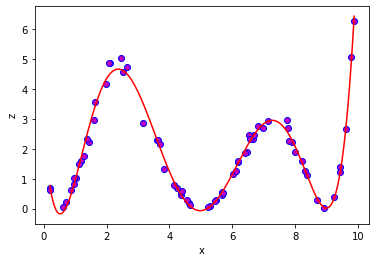

In [10]:
##### 1 ########
def basis_polynomial(x, m):
    return np.array([x**i for i in range(m)]).T

m = 8 # base
phi = basis_polynomial(x, m)

####### 2 solve equ ############
w = np.linalg.solve(phi.T.dot(phi), phi.T.dot(z))

######## 3 ###########
x_ = np.linspace(x.min(), x.max(), 201)
phi_ = basis_polynomial(x_, m)

######### 4 ############
z_ = phi_.dot(w)

plt.axes(xlabel='x', ylabel='z')
plt.scatter(x, z, c='m', edgecolor='b')

plt.plot(x_, z_, 'r')
plt.show()

# Polynomial Regression : basis fn = polynomial

In [19]:
class PolynomialRegression:
    def __init__(self, m=4):
        self.m = m
    def learn(self, x, z):
        phi = self.base(x)
        self.w = np.linalg.solve(phi.T.dot(phi), phi.T.dot(z))
    def predict(self, x_):
        phi_ = self.base(x_)
        return phi_.dot(self.w)
    def base(self, x):
        return x[:, None] ** np.arange(self.m)
    

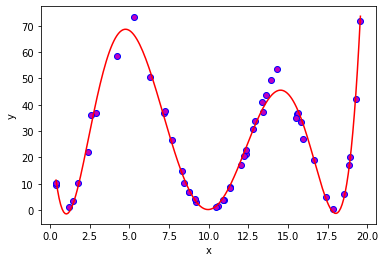

In [36]:
np.random.seed(0)
n = 50
x = np.random.uniform(0, 20, n)
z = ((x-1)**2 *(x-10)**2 *(x-18)**2) * np.random.normal(1, .1, n)/1000

pR = PolynomialRegression(m=8)
pR.learn(x, z)
x_ = np.linspace(x.min(), x.max(), 201)
z_ = pR.predict(x_)

plt.axes(xlabel='x', ylabel='y')
plt.scatter(x, z, c='m', edgecolor='b')
plt.plot(x_, z_, 'r')
plt.show()

#### Polynomial Regression Can also made by **Gradient Descent** Technique

# Now use **Gauss function** as Base
# $$ 
\begin{align}
\phi(x) = e^{-\gamma(x-\mu)^2} \\
\phi_j(x_i) = e^{-\gamma(x_i-x_j)^2} 
\end{align}
$$

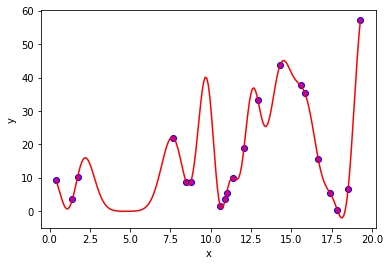

In [39]:
def gauss(x1, x2, gamma):
    return np.exp(-gamma * (x1-x2)**2)

np.random.seed(0)
n = 20
x = np.random.uniform(0, 20, n)
z = ((x-1)**2 *(x-10)**2 *(x-18)**2) * np.random.normal(1, .1, n)/1000

gamma = 1 # how fast value descent from gauss bell
phi = gauss(x, x[:, None], gamma)
w = np.linalg.solve(phi.T.dot(phi), phi.T.dot(z))

x_ = np.linspace(x.min(), x.max(), 201)
phi_ = gauss(x, x_[:, None], gamma)
z_ = phi_.dot(w)

plt.axes(xlabel='x', ylabel='y')
plt.scatter(x, z, c='m', edgecolor='b')
plt.plot(x_, z_, 'r')
plt.show()

# Regularize for better outcome

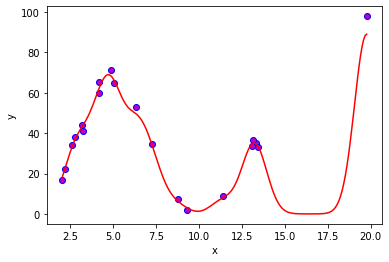

In [42]:
def gauss(x1, x2, gamma):
    return np.exp(-gamma * (x1-x2)**2)

# np.random.seed(0)
n = 20
x = np.random.uniform(0, 20, n)
z = ((x-1)**2 *(x-10)**2 *(x-18)**2) * np.random.normal(1, .1, n)/1000

gamma = 1 # how fast value descent from gauss bell
phi = gauss(x, x[:, None], gamma)
lamda = .1
w = np.linalg.solve(phi.T.dot(phi) + np.eye(len(x)) * lamda,  phi.T.dot(z))
# w = np.linalg.solve(phi.T.dot(phi), phi.T.dot(z))

x_ = np.linspace(x.min(), x.max(), 201)
phi_ = gauss(x, x_[:, None], gamma)
z_ = phi_.dot(w)

plt.axes(xlabel='x', ylabel='y')
plt.scatter(x, z, c='m', edgecolor='b')
plt.plot(x_, z_, 'r')
plt.show()

In [45]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

# PolynomalReg use Gauss as base funcion

In [46]:
class PolynomialRegression:
    def __init__(self,gamma=1, lamb=0.1):
        self.lamd = lamd
        self.m = m
    def learn(self, x, z):
        phi = self.gauss(x)
        self.w = np.linalg.solve(phi.T.dot(phi) + np.eye(len(x)) * self.lamd,
                            phi.T.dot(z))
        self.x = x
    def predict(self, x_):
        phi_ = self.gauss(self.x, x_[:,None])
        return phi_.dot(self.w)
    def gauss(self, x1, x2):
        return np.exp(-self.gamma*(x1-x2)**2)